<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0, Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake dataset, and in the subsequent lectures, we will focus on real datasets along with feature engineering. For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data consists of measurements for rare gem stones, with 2 features (we don't know what those features are) and a sale price. Our final goal would be to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [82]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Explore the data

Let's take a quick look, and we should see strong correlation between Feature 2 and the "price" of the gem stone.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

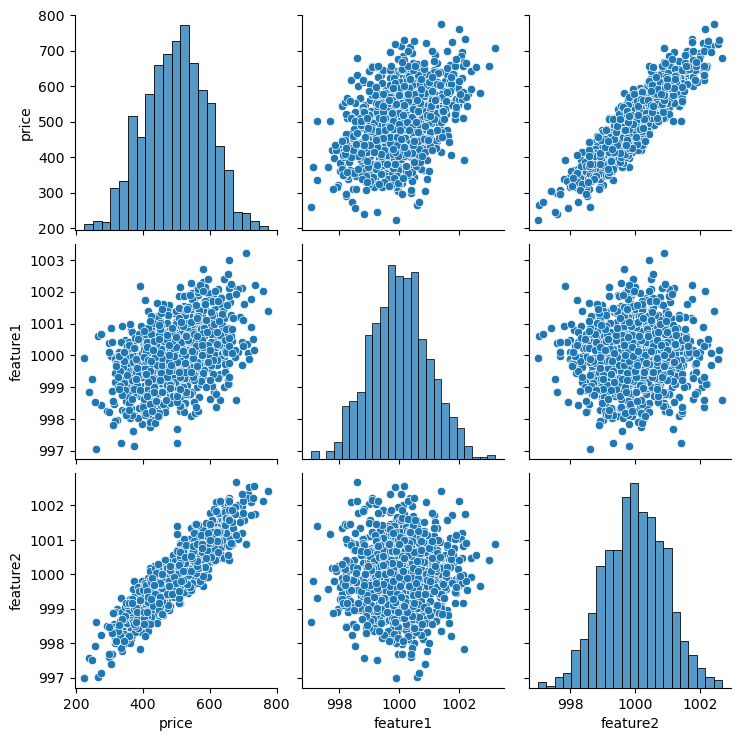

In [5]:
sns.pairplot(df);

Feel free to visualize more, but this data is fake so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail.

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras (by using .values)

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
type(X_train)

numpy.ndarray

In [9]:
# 2 features, 700 rows TRAINING SET

X_train.shape

(700, 2)

In [10]:
# 2 features, 300 rows TEST SET

X_test.shape

(300, 2)

In [11]:
# 700 rows, TRAINING SET

y_train.shape

(700,)

In [12]:
# 300 rows, TEST SET

y_test.shape

(300,)

## Normalizing/Scaling the Data

We need to 'scale' the feature data using `MinMaxScaler`.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [15]:
scaler = MinMaxScaler()

In [16]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
X_train.min()

0.0

In [20]:
X_test.max()

1.0186515935232023

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is a hugely personal style choice!).

Please use any import methods you prefer - we will use the method shown in the **official TF documentation**.

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential

In [30]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, on every

## Creating a Model

There are two ways to create models through the TensorFflow 2.0 Keras API: either pass in a list of layers all at once, or add them one by one.

Let's show both methods (it's up to you to choose which method you prefer).

In [24]:
# Dense method implements densely-connected layer
# Activation method applies activation function to output

from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [28]:
model = Sequential([Dense(units=2), 
                    Dense(units=2), 
                    Dense(units=2)])

### Model - adding in layers one by one

In [29]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [55]:
model = Sequential()

# Input and hidden layers contain 4 neurons with ReLU function applied
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Final output node for prediction
model.add(Dense(1, activation='relu'))

model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* **Sample**: one element of a dataset.
    * e.g. one image is a sample in a convolutional network
    * e.g. one audio file is a sample for a speech recognition model
* **Batch**: a set of *N* samples. The samples in a batch are processed independently, and in parallel. If training the model, a batch results in only one update to the model. A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation. However, it is also true that the batch will take longer to process and still result in only one update. For inference (evaluation/prediction), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", and is used to separate training data into distinct phases, which is useful for 'logging' and periodic evaluation.
* When using `validation_data` or `validation_split` with the `fit` method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add **callbacks** specifically designed to be run at the end of an epoch. Examples of these are 'learning rate changes' and 'model checkpointing' (saving).

In [56]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256667.7969
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256569.8438
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256466.7188
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256339.7031
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256179.2500
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255987.9062
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255765.4219
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255514.5781
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255232.7969
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 254919.8438
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254573.0469
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 2276.6638
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 2237.5686
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 2201.6797
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 2163.2275
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 2122.5459
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 2083.8455
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 2047.0830
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 2007.1945
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 1971.0636
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1935.1766
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1901.5861
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1866.49

22/22 [==============================] - 0s 1ms/step - loss: 40.3903
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 37.9733
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 35.3333
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 33.5923
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 32.9205
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 30.5824
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 29.6320
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 28.6684
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 27.6348
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 27.1185
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 26.6334
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 26.1997
Epoch 205/250
22/2

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for *overfitting*.

In [57]:
model.history.history

{'loss': [256667.796875,
  256569.84375,
  256466.71875,
  256339.703125,
  256179.25,
  255987.90625,
  255765.421875,
  255514.578125,
  255232.796875,
  254919.84375,
  254573.046875,
  254189.671875,
  253766.578125,
  253301.71875,
  252794.65625,
  252240.921875,
  251638.125,
  250987.0,
  250282.765625,
  249515.203125,
  248691.796875,
  247802.40625,
  246843.796875,
  245798.453125,
  244665.546875,
  243443.75,
  242133.21875,
  240716.65625,
  239209.734375,
  237595.765625,
  235889.0,
  234062.53125,
  232124.734375,
  230071.078125,
  227905.078125,
  225615.015625,
  223207.046875,
  220659.421875,
  217979.0,
  215168.609375,
  212232.9375,
  209144.203125,
  205924.546875,
  202552.890625,
  199052.984375,
  195402.5625,
  191600.140625,
  187661.65625,
  183583.296875,
  179358.390625,
  174993.78125,
  170475.5,
  165826.90625,
  161041.421875,
  156125.546875,
  151086.53125,
  145904.75,
  140643.390625,
  135238.03125,
  129741.09375,
  124166.5625,
  118515.382

In [58]:
loss = model.history.history['loss']

In [59]:
loss

[256667.796875,
 256569.84375,
 256466.71875,
 256339.703125,
 256179.25,
 255987.90625,
 255765.421875,
 255514.578125,
 255232.796875,
 254919.84375,
 254573.046875,
 254189.671875,
 253766.578125,
 253301.71875,
 252794.65625,
 252240.921875,
 251638.125,
 250987.0,
 250282.765625,
 249515.203125,
 248691.796875,
 247802.40625,
 246843.796875,
 245798.453125,
 244665.546875,
 243443.75,
 242133.21875,
 240716.65625,
 239209.734375,
 237595.765625,
 235889.0,
 234062.53125,
 232124.734375,
 230071.078125,
 227905.078125,
 225615.015625,
 223207.046875,
 220659.421875,
 217979.0,
 215168.609375,
 212232.9375,
 209144.203125,
 205924.546875,
 202552.890625,
 199052.984375,
 195402.5625,
 191600.140625,
 187661.65625,
 183583.296875,
 179358.390625,
 174993.78125,
 170475.5,
 165826.90625,
 161041.421875,
 156125.546875,
 151086.53125,
 145904.75,
 140643.390625,
 135238.03125,
 129741.09375,
 124166.5625,
 118515.3828125,
 112790.4453125,
 106964.5234375,
 101099.2578125,
 95211.585937

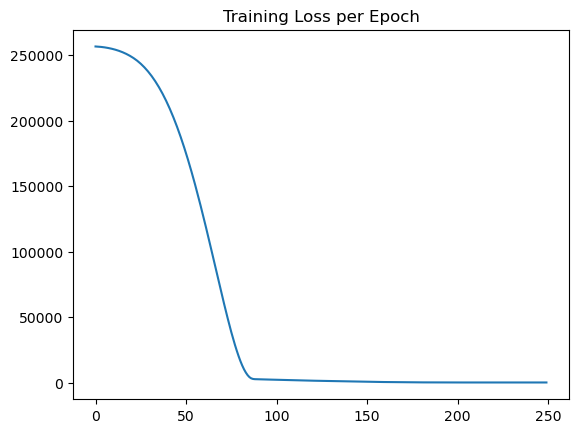

In [60]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
# Cut-off point just below 100 epochs before loss value levels off

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [61]:
model.metrics_names

['loss']

In [62]:
training_score = model.evaluate(X_train, y_train, verbose=0)

test_score = model.evaluate(X_test, y_test, verbose=0)

In [63]:
training_score

25.203392028808594

In [64]:
test_score

25.542219161987305

In [44]:
# As you can see, the values are quite close together, which indicates the model is 'approximating' well

### Further Evaluations

In [65]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [66]:
# If all your predictions are the same, your model is not learning! 
# In case of this, make sure your activation functions aren't contradicting each other and re-train model

test_predictions

array([[404.49637],
       [622.5295 ],
       [591.1511 ],
       [571.271  ],
       [365.8692 ],
       [578.21436],
       [514.1577 ],
       [458.25793],
       [548.3127 ],
       [446.68103],
       [610.78723],
       [548.00226],
       [418.29346],
       [408.07468],
       [650.1965 ],
       [436.47214],
       [507.55032],
       [658.89197],
       [661.53754],
       [564.58215],
       [333.50885],
       [444.00186],
       [381.75873],
       [377.98776],
       [565.6424 ],
       [609.59906],
       [531.47253],
       [427.044  ],
       [654.4072 ],
       [413.27667],
       [441.8031 ],
       [484.25555],
       [437.5878 ],
       [680.78406],
       [423.9405 ],
       [416.88397],
       [501.03033],
       [549.53754],
       [508.84253],
       [394.5811 ],
       [617.5847 ],
       [415.82184],
       [603.4573 ],
       [445.12122],
       [501.10022],
       [580.7395 ],
       [667.9402 ],
       [489.5224 ],
       [317.8686 ],
       [484.55545],


In [67]:
# Create DataFrame of actual output values, to add predicted values alongside

pred_df = pd.DataFrame(y_test, columns=['Y Test'])

In [68]:
pred_df

,Y Test
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [69]:
# Convert array of predictions to Series

test_predictions = pd.Series(test_predictions.reshape(300,))

In [70]:
test_predictions

0      404.496368
1      622.529480
2      591.151123
3      571.270996
4      365.869202
          ...    
295    528.132141
296    514.441101
297    608.654480
298    416.146515
299    410.079803
Length: 300, dtype: float32

In [71]:
# Add predictions column to DataFrame

pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [72]:
# Add column names to DataFrame for plotting
pred_df.columns = ['Actual Values', 'Predictions']

In [73]:
pred_df

,Actual Values,Predictions
0,402.296319,404.496368
1,624.156198,622.529480
2,582.455066,591.151123
3,578.588606,571.270996
4,371.224104,365.869202
...,...,...
295,525.704657,528.132141
296,502.909473,514.441101
297,612.727910,608.654480
298,417.569725,416.146515


Let's compare to the actual test labels using visualization:

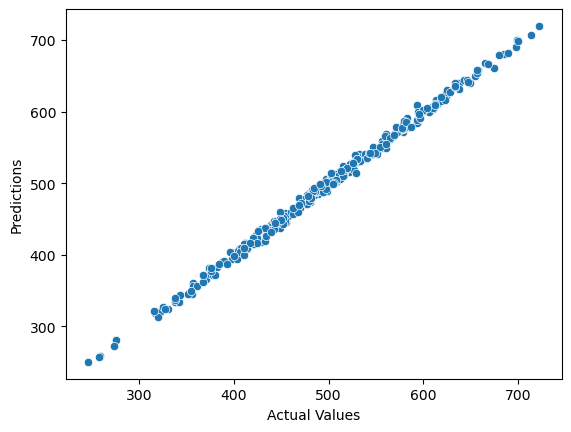

In [74]:
sns.scatterplot(x='Actual Values', y='Predictions', data=pred_df);

In [ ]:
# Wow! Our predictions are very close to the real values

In [75]:
# Calculate error as difference between actual values and predictions

pred_df['Error'] = pred_df['Actual Values'] - pred_df['Predictions']

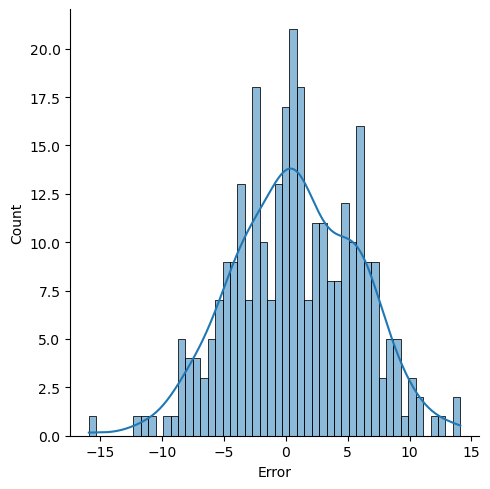

In [76]:
sns.displot(pred_df['Error'], bins=50, kde=True);

In [ ]:
# Distribution of errors is fairly 'normal' which indicates a good model

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
# Mean Absolute Error is the average of errors, i.e. an average of $4 off the actual value

mean_absolute_error(pred_df['Actual Values'], pred_df['Predictions'])

4.0480003365122075

In [79]:
# Mean Squared Error to get RMSE value

mean_squared_error(pred_df['Actual Values'], pred_df['Predictions'])

25.54222422548755

In [80]:
# Essentially MSE is same as the test score generated through model evaluation - difference is just due to precision
test_score

25.542219161987305

In [81]:
# RMSE (alternative way of square root - remember linear algebra!)
test_score ** 0.5

5.053931060272519

In [ ]:
# Using RMSE value, you can be more precise by saying we are about $5 off the accurate sale price 
# Not bad results! If the average sale price is approx $499, then you are approx. 1% off in your predictions

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [84]:
# Add unseen data in array format [[Feature1, Feature2]]

new_gem = [[998, 1000]]

In [85]:
# Don't forget to scale feature input

scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [86]:
new_gem = scaler.transform(new_gem)

In [87]:
# Predict value using trained model

model.predict(new_gem)

1/1 [==============================] - 0s 23ms/step


array([[418.88602]], dtype=float32)

In [ ]:
# New gem stone is worth approx. $419

## Saving and Loading a Model

In [83]:
from tensorflow.keras.models import load_model

In [88]:
model.save('my_model.h5')  # creates an HDF5 file called 'my_model.h5'

In [89]:
later_model = load_model('my_model.h5')

In [90]:
# Check saved model is still working!

later_model.predict(new_gem)

1/1 [==============================] - 0s 58ms/step


array([[418.88602]], dtype=float32)